In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [14]:
X,y =make_blobs(n_samples=500,centers=3,cluster_std=4, random_state=42)

In [15]:
df=pd.DataFrame(X,columns=["Feature1","Feature2"])

In [16]:
df

,Feature1,Feature2
0,-2.282534,-9.692815
1,-6.147668,1.755990
2,13.399091,-1.260023
3,-4.077630,3.160226
4,9.444735,0.340868
...,...,...
495,-1.282205,-3.181575
496,-2.817604,10.378894
497,3.296740,8.649256
498,-8.970519,-2.684073


In [17]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(df)

In [18]:
K_range=range(1,11)

In [19]:
inertia=[]
for k in K_range:
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

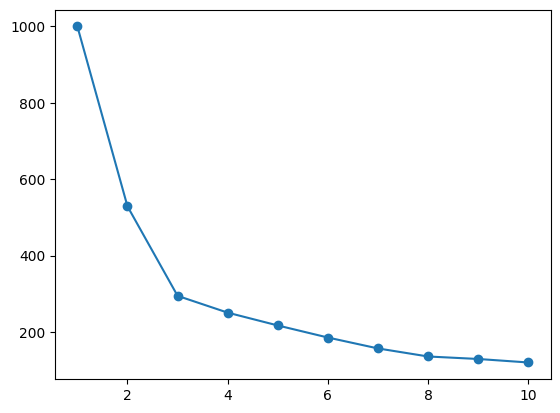

In [20]:
plt.plot(K_range,inertia,marker='o')

In [21]:
kmeans_final=KMeans(n_clusters=3,random_state=42)
cluster_labels=kmeans_final.fit_predict(X_scaled)

In [22]:
df["cluster"]=cluster_labels

<Axes: xlabel='Feature1', ylabel='Feature2'>

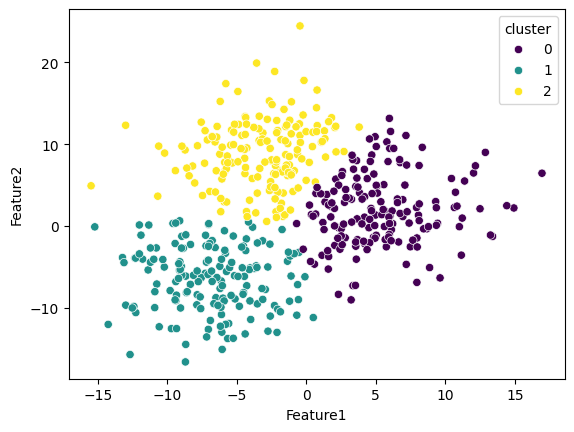

In [23]:
sns.scatterplot(x=df['Feature1'],
                y=df['Feature2'],hue=df['cluster'],palette='viridis')

In [24]:
from sklearn.datasets import make_moons

In [25]:
X_1,y_true=make_moons(n_samples=500,noise=0.05,random_state=42)

In [30]:
from sklearn.cluster import KMeans,DBSCAN
df1=pd.DataFrame(X_1,columns=['Feature_1','Feature_2'])

In [31]:
scaler=StandardScaler()
X_scaled_1=scaler.fit_transform(df1)


In [32]:
kmeans=KMeans(n_clusters=2,random_state=42)
kmean_label=kmeans.fit_predict(X_scaled_1)

In [33]:
df['kmeans_cluster']=kmean_label

<Axes: xlabel='Feature_1', ylabel='Feature_2'>

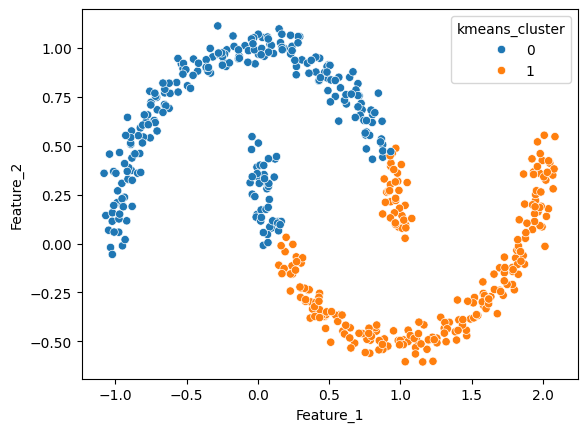

In [35]:
sns.scatterplot(x=df1['Feature_1'],y=df1['Feature_2'],hue=df['kmeans_cluster'],palette="tab10")

In [36]:
db_scan=DBSCAN(eps=0.3,min_samples=5)
db_scan_labels=db_scan.fit_predict(X_scaled_1)

In [41]:
df['dbscan_cluster']= db_scan_labels

<Axes: xlabel='Feature_1', ylabel='Feature_2'>

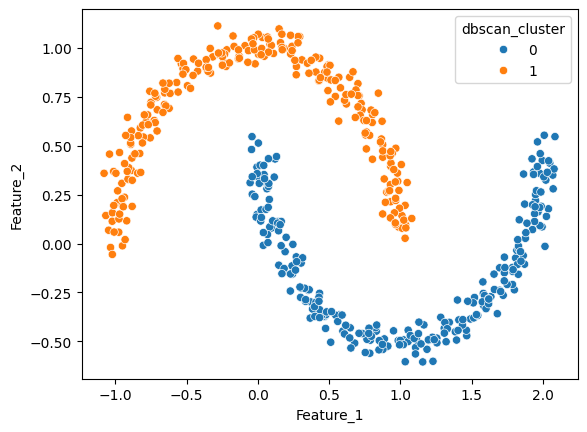

In [42]:
sns.scatterplot(x=df1['Feature_1'],y=df1['Feature_2'],hue=df['dbscan_cluster'],palette='tab10')